In [12]:
%pip install yfinance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.1 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=e22663be3b3ec0bce450f

In [13]:
# Cell 1: Import libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
# Cell 2: Load historical stock data
ticker = 'AAPL'
data = yf.download(ticker, period='1y')
print(data.head())

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_7392\881940583.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2024-08-02  218.836578  224.549865  216.696592  218.129877  105568600
2024-08-05  208.295868  212.506173  195.087635  198.163247  119548600
2024-08-06  206.265350  209.012512  200.134036  204.344342   69660500
2024-08-07  208.843307  212.645518  205.429266  205.936887   63516400
2024-08-08  212.317047  213.202904  207.857906  212.117981   47161100


In [15]:
# Cell 3: Prepare features and target
data['Next_Close'] = data['Close'].shift(-1)
data = data.dropna()
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Next_Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [22]:
# Cell 4: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

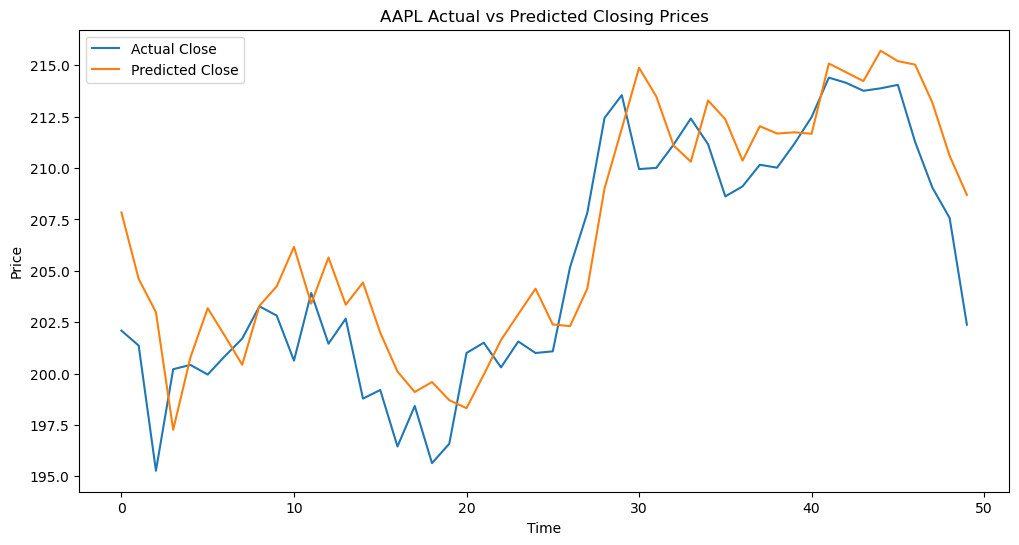

In [21]:
# Cell 5: Plot actual vs predicted closing prices
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Close')
plt.plot(predictions, label='Predicted Close')
plt.title(f'{ticker} Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()